In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv(r"C:\Users\KIIT_Intern\Desktop\Datasets\testset.csv")

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [117]:
df['_conds'].nunique()

39

# EDA & Data Munging

In [5]:
# We can see all the column name has space in there names, lets assign new names with removed space.
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [6]:
df.columns = map(lambda x: x.strip(), df.columns)

In [7]:
df.columns # Space removed

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [8]:
# Lets check the usual whether codition. We can see usually delhi's weather is either Haze, Smoke. Not good
# for health. :()
df._conds.value_counts(ascending=False)

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

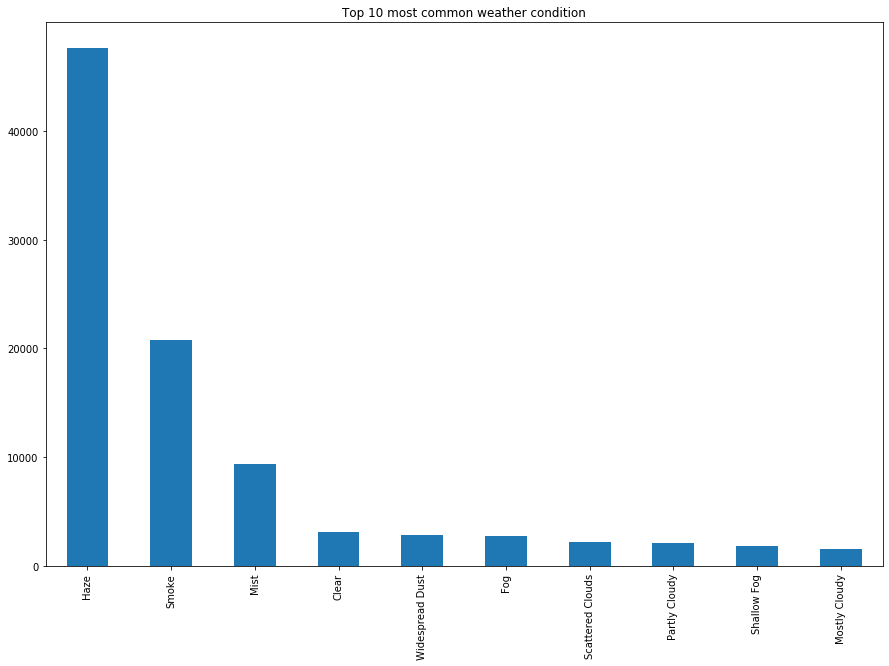

In [9]:
# Lets plot top 10 weather condition in delhi.
plt.figure(figsize=(15, 10));
df._conds.value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.plot();
# We can clearly see that haze and smoe are the most commo weather condition in delhi.

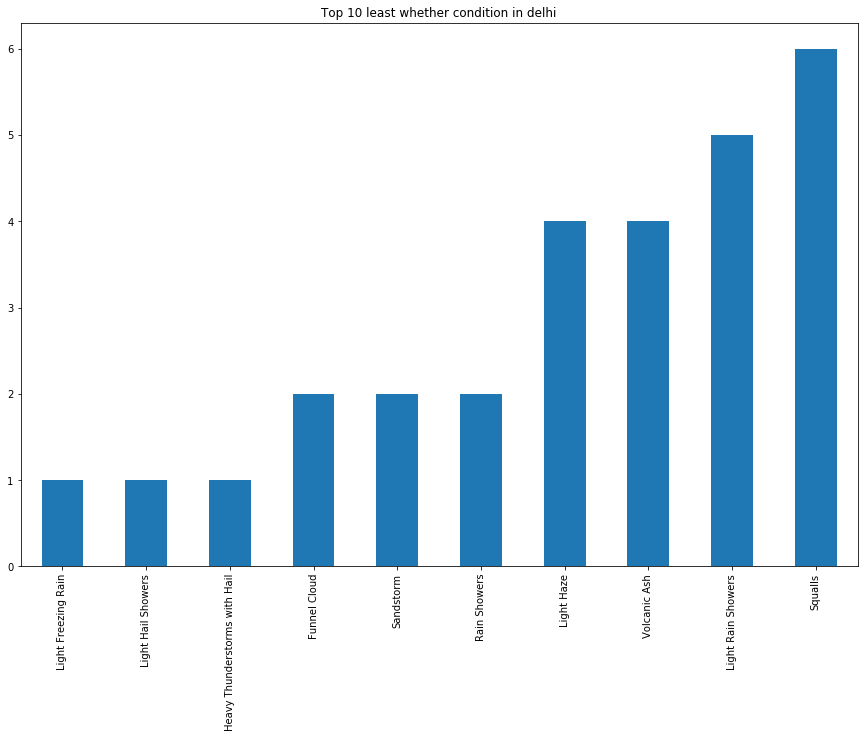

In [10]:
# Lets see top 10 least condition
plt.figure(figsize=(15, 10));
df._conds.value_counts(ascending=True).head(10).plot(kind="bar");
plt.title("Top 10 least whether condition in delhi");
plt.plot();

In [11]:
# common wind direction
df._wdire.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

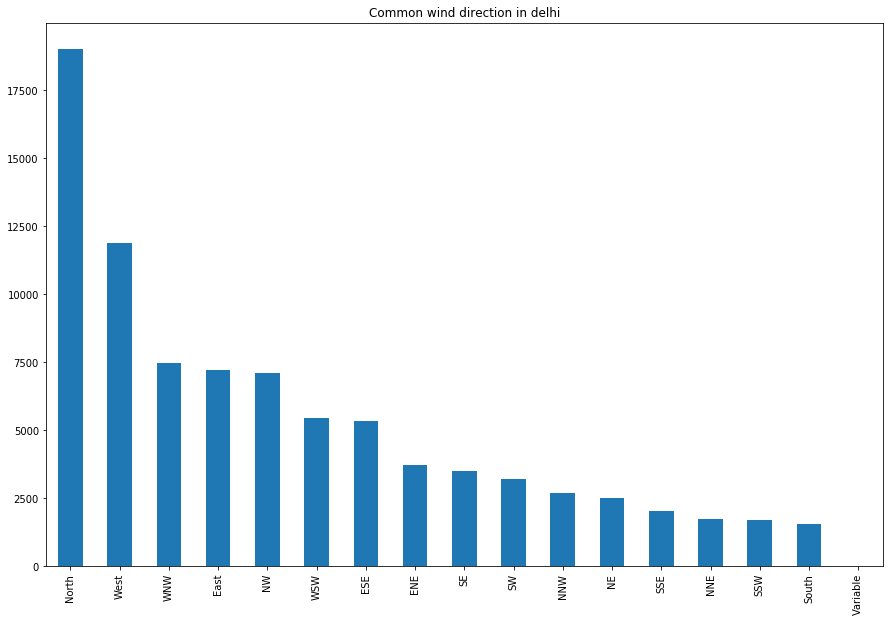

In [12]:
plt.figure(figsize=(15, 10));
plt.title("Common wind direction in delhi");
df._wdire.value_counts().plot(kind="bar");
plt.plot();

In [13]:
# Average temprature
print("average temprature in delhi:", round(df._tempm.mean(axis=0),2))

average temprature in delhi: 25.45


In [14]:
df['datetime_utc']=pd.to_datetime(df['datetime_utc'])

In [15]:
# As we can see there is datetime column, We can extract year and month from it. Year and month can ve an important feature
# for us to calculate how temprature is changing according to them
df['year']=df['datetime_utc'].dt.year
df['month']=df['datetime_utc'].dt.month
df['day']=df['datetime_utc'].dt.day

In [16]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month,day
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11,1
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11,1
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11,1
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11,1
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11,1


In [17]:
# lets check out data range
print("max, min: ", df.year.max(), ",", df.year.min())

max, min:  2017 , 1996


In [18]:
# So our given data is from 1996 to 2017. 

In [19]:
# Number of records for paticular year
df.year.value_counts()

2003    13186
2004     9151
2002     8503
2001     8403
2016     6634
1997     6513
1999     6300
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
2017     1420
1996     1278
Name: year, dtype: int64

In [20]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

In [21]:
df_mean = df.groupby("year")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)

In [22]:
df_mean.dtypes

year        int64
_tempm    float64
dtype: object

In [23]:
df_mean.year = df_mean.year.astype("float")

In [24]:
df_mean.dtypes

year      float64
_tempm    float64
dtype: object

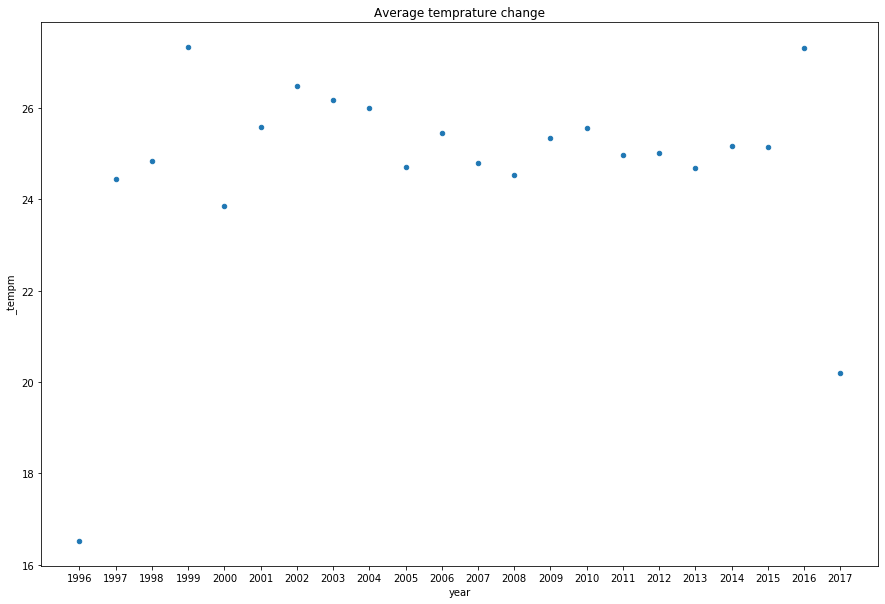

In [25]:

df_mean.plot(kind="scatter", x="year", y="_tempm", figsize=(15, 10))

plt.xticks(df_mean.year);
plt.title("Average temprature change");
plt.plot();

So u can see there was a big change in year 1996-1997. It may be because of many reasons:
1. New industries started in the city.
2. People started purchasing more vehicles.
or any other reasons.

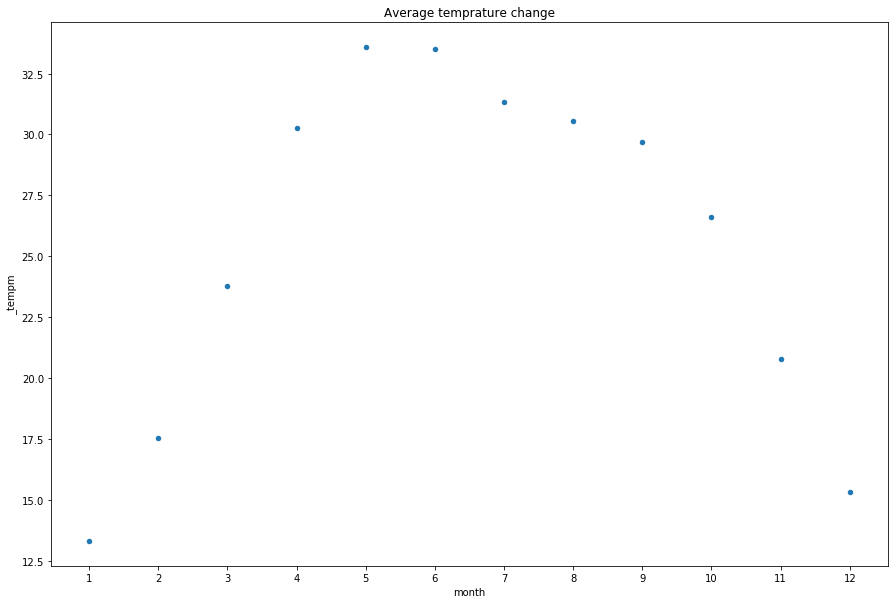

In [26]:
df_mean = df.groupby("month")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)
df_mean.plot(kind="scatter", x="month", y="_tempm", figsize=(15, 10))

plt.xticks(df_mean.month);
plt.title("Average temprature change");
plt.plot();

The temperature changes according to season in every month and it is distributed normally.

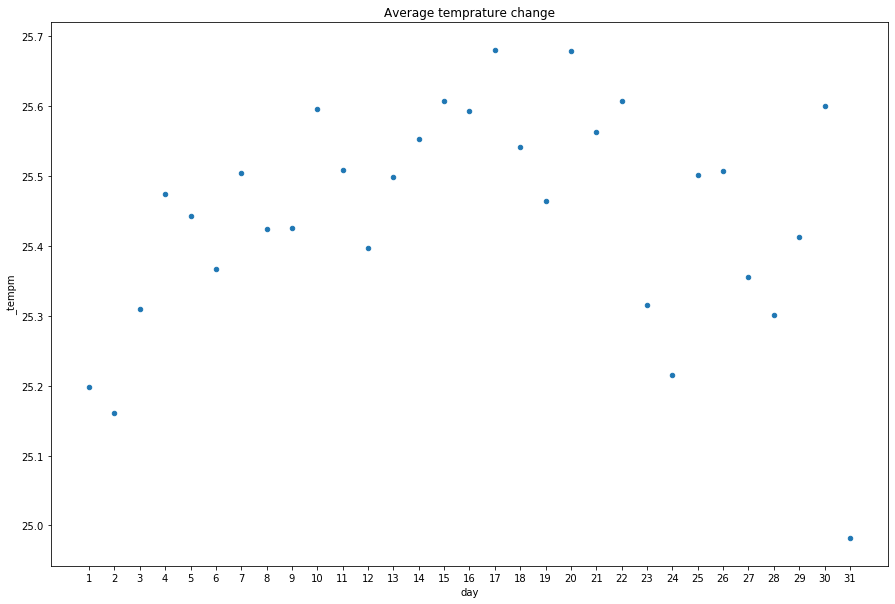

In [27]:
df_mean = df.groupby("day")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)
df_mean.plot(kind="scatter", x="day", y="_tempm", figsize=(15, 10))

plt.xticks(df_mean.day);
plt.title("Average temprature change");
plt.plot();

In [28]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm', 'year', 'month', 'day'],
      dtype='object')

# Missing Values

In [29]:
df.shape

(100990, 23)

In [30]:
print(df.isnull().sum().count())
df.isnull().sum()

23


datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
day                  0
dtype: int64

In [31]:
main_data=df.copy()

In [32]:
df.isna().mean().round(4) * 100 #percentage of missing values

datetime_utc      0.00
_conds            0.07
_dewptm           0.61
_fog              0.00
_hail             0.00
_heatindexm      71.13
_hum              0.75
_precipm        100.00
_pressurem        0.23
_rain             0.00
_snow             0.00
_tempm            0.67
_thunder          0.00
_tornado          0.00
_vism             4.38
_wdird           14.61
_wdire           14.61
_wgustm          98.94
_windchillm      99.43
_wspdm            2.33
year              0.00
month             0.00
day               0.00
dtype: float64

In [33]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail',
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month",'day']]

In [34]:
df_filtered.dtypes

datetime_utc    datetime64[ns]
_conds                  object
_dewptm                float64
_fog                     int64
_hail                    int64
_hum                   float64
_pressurem             float64
_rain                    int64
_snow                    int64
_tempm                 float64
_thunder                 int64
_tornado                 int64
_vism                  float64
_wdird                 float64
_wdire                  object
_wspdm                 float64
year                     int64
month                    int64
day                      int64
dtype: object

In [35]:
# Lets replace missing values in _dewptm. We can take an avrgae of that year
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day
124,1996-11-08 01:00:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11,8
240,1996-11-13 02:00:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11,13
303,1996-11-16 06:00:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11,16
520,1996-11-26 04:00:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11,26
584,1996-11-29 18:00:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96965,2016-09-07 08:30:00,Haze,NaN,0,0,NaN,1005.0,0,0,NaN,0,0,4.5,320.0,NW,9.3,2016,9,7
97259,2016-09-24 12:30:00,Haze,NaN,0,0,NaN,1002.0,0,0,NaN,0,0,3.0,0.0,North,0.0,2016,9,24
98049,2016-10-25 07:30:00,Widespread Dust,NaN,0,0,NaN,1009.0,0,0,NaN,0,0,3.5,280.0,West,14.8,2016,10,25
99347,2016-12-21 05:30:00,Haze,NaN,0,0,NaN,1018.0,0,0,NaN,0,0,3.0,270.0,West,11.1,2016,12,21


In [36]:
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val
    

In [37]:
df_filtered[df_filtered._dewptm.isnull()] # We replaced null values fof _dewtmp

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day


In [38]:
df_filtered.shape

(100990, 19)

In [39]:
df_filtered.isnull().sum()
# so now we have only relevant columns. Lets handle them one by one.

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
day                 0
dtype: int64

In [40]:
# Handle _hum column.
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day
124,1996-11-08 01:00:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.00,0.0,North,0.0,1996,11,8
240,1996-11-13 02:00:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11,13
303,1996-11-16 06:00:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11,16
520,1996-11-26 04:00:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.60,0.0,North,0.0,1996,11,26
584,1996-11-29 18:00:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.70,0.0,North,0.0,1996,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98641,2016-11-17 07:30:00,Unknown,10.000000,0,0,NaN,1017.0,0,0,NaN,0,0,NaN,0.0,North,NaN,2016,11,17
99268,2016-12-17 09:00:00,Smoke,11.000000,0,0,NaN,1016.0,0,0,NaN,0,0,1.00,20.0,NNE,25.9,2016,12,17
99347,2016-12-21 05:30:00,Haze,18.274320,0,0,NaN,1018.0,0,0,NaN,0,0,3.00,270.0,West,11.1,2016,12,21
99567,2016-12-31 15:00:00,NaN,13.000000,0,0,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,59.3,2016,12,31


In [41]:
# We will use the same logic o replace as we did before.
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val
    

In [42]:
df_filtered[df_filtered._hum.isnull()] # replaced

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day


In [43]:
df_filtered.isnull().sum() # Now lets handle _pressurem

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
day                 0
dtype: int64

In [44]:
df_filtered[df_filtered._pressurem.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day
60703,2004-06-25 21:00:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,6,25
60723,2004-06-28 09:00:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,6,28
60728,2004-06-29 00:00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,6,29
60921,2004-07-23 09:00:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,7,23
61255,2004-08-29 18:00:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,8,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96567,2016-08-21 00:00:00,Mist,25.0,0,0,81.0,NaN,0,0,28.0,0,0,2.0,110.0,ESE,9.3,2016,8,21
96907,2016-09-02 18:00:00,Mist,25.0,0,0,79.0,NaN,0,0,28.0,0,0,2.0,270.0,West,7.4,2016,9,2
98402,2016-11-08 06:00:00,Smoke,14.0,0,0,39.0,NaN,0,0,25.0,0,0,1.0,270.0,West,22.2,2016,11,8
98820,2016-11-26 09:00:00,Haze,8.0,0,0,15.0,NaN,0,0,30.0,0,0,4.0,290.0,WNW,14.8,2016,11,26


In [45]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11,1
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11,1
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11,1
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11,1
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11,1


In [46]:
# if you see pressure column, there are few -9999 values. Which is obviously bad values and it can affect your
# calculations very badly. So we will consider this also missing values. Lets convert them first to the nan
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [47]:
df_filtered.head() # so now -9999.0 is Nan.Lets again get the number of missing values in _pressurem

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11,1
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11,1
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11,1
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11,1
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11,1


In [48]:
df_filtered._pressurem.isnull().sum() # So u can see previsously it was 232 and now its 983. 
# We need to check the data for this kin of errors.
# So we will use the same idea as before We will replace missing values with the mean values of _hum column
# for that partcular year.

983

In [49]:

for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val
    

In [50]:
df_filtered.isnull().sum() # pressurem is also resolved. Lets apply same for other columns. I will make
# it quickly. Process will be the same as above.

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
day                 0
dtype: int64

In [51]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val
    

In [52]:
for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val

In [53]:
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val

In [54]:
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val

In [55]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm              0
_thunder            0
_tornado            0
_vism               0
_wdird              0
_wdire          14755
_wspdm              0
year                0
month               0
day                 0
dtype: int64

In [56]:
# As we can see _wdire is a categorical feature so we can not apply mean here. We have to get the most frequent
# value of _wdire for a year and then replace missing value with the most frequent value.
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

In [57]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
day              0
dtype: int64

In [58]:
# now we can see,  _conds which is again acategorical feature.
# so we will apply again the same strategy as above(_wdire)
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [59]:
df_filtered.isnull().sum()


datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
day             0
dtype: int64

In [60]:
## So finally ..... WE HAVE REPLACED ALL THE MISSING VALUES. Phew... Thats a whole big task.


Now our dataset doesn;t have any missing values in it. Now we should observe one thing. That our _windre is
a categorical column and it is also important to predict a whether but the thing is your model does not understand a text value. So we need to encode this categorical column so that we can change it to integer

In [61]:
df_filtered._conds.value_counts()

Haze                             47674
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

# Feature & Target Matrix

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [63]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,West,7.400000,1996,11,1
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,North,5.052735,1996,11,1
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,North,5.052735,1996,11,1
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,North,5.052735,1996,11,1
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,North,0.000000,1996,11,1


In [64]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', 'day','_conds']

In [65]:
# Lets create a new dataset, so that we dont change in our filtered dataset
# We will create dataset in such a way, _wdire(categorical feature in starting position & target variable
# at last which is _conds
df_final = df_filtered[feature_columns]

In [66]:
df_final.head()

,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,day,_conds
0,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,1,Smoke
1,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,1,Smoke
2,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,1,Smoke
3,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,1,Smoke
4,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,1,Smoke


In [67]:
df_final.dtypes

_wdire         object
_dewptm       float64
_fog            int64
_hail           int64
_hum          float64
_pressurem    float64
_rain           int64
_snow           int64
_tempm        float64
_thunder        int64
_tornado        int64
_vism         float64
_wdird        float64
_wspdm        float64
year            int64
month           int64
day             int64
_conds         object
dtype: object

In [68]:
df_final._wdire.value_counts()

West        19970
North       19714
NW          13110
WNW          7464
East         7233
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

In [69]:
wdire_dummies = pd.get_dummies(df_final["_wdire"])

In [70]:
df_final = pd.concat([wdire_dummies, df_final], axis=1)

In [71]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,day,_conds
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,1,Smoke
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,1,Smoke
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,1,Smoke
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,1,Smoke
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,1,Smoke


In [72]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', 'day', '_conds'],
      dtype='object')

In [73]:
df_final.drop("_wdire", inplace=True, axis=1)

In [74]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       'day', '_conds'],
      dtype='object')

In [75]:
df_final['_conds']=LabelEncoder().fit_transform(df_final._conds)

In [76]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,day,_conds
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,1,31
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,1,31
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,1,31
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,1,31
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,1,31


In [77]:
df_final['_conds'].nunique()

39

Feature Importance and Feature selection

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    df_final.drop(labels=['_conds'], axis=1),
    df_final['_conds'],
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((75742, 33), (25248, 33))

[('ENE', 0.0023947559921530183), ('ESE', 0.0026327634527988503), ('East', 0.0030126147686731744), ('NE', 0.001929199917651675), ('NNE', 0.0014612192899020595), ('NNW', 0.0017644717088037064), ('NW', 0.005841210550741962), ('North', 0.00900999766843115), ('SE', 0.0020606156638303032), ('SSE', 0.0017068841863620272), ('SSW', 0.0015876974356222357), ('SW', 0.0023927332753394598), ('South', 0.0014585491133157736), ('Variable', 1.0839242256342376e-05), ('WNW', 0.0033117926007562846), ('WSW', 0.0031167853202388874), ('West', 0.010159434598399788), ('_dewptm', 0.0699047162422897), ('_fog', 0.04345132682960541), ('_hail', 8.907174000966757e-05), ('_hum', 0.13264930362649313), ('_pressurem', 0.08598432158683153), ('_rain', 0.0249163219952598), ('_snow', 0.0), ('_tempm', 0.09216801291169376), ('_thunder', 0.009198404123632922), ('_tornado', 3.110833394124059e-05), ('_vism', 0.1470285053497499), ('_wdird', 0.045428600041563204), ('_wspdm', 0.05061239426690455), ('year', 0.1076754491677484), ('mon

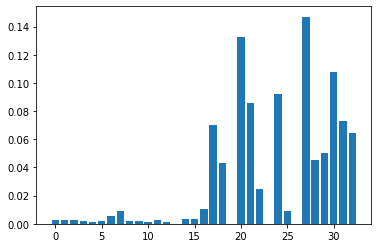

In [80]:
#clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
l=list(zip(X_train.columns, importance))
print(l)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [81]:
for i,j in enumerate(l):
    print(i,j)

0 ('ENE', 0.0023947559921530183)
1 ('ESE', 0.0026327634527988503)
2 ('East', 0.0030126147686731744)
3 ('NE', 0.001929199917651675)
4 ('NNE', 0.0014612192899020595)
5 ('NNW', 0.0017644717088037064)
6 ('NW', 0.005841210550741962)
7 ('North', 0.00900999766843115)
8 ('SE', 0.0020606156638303032)
9 ('SSE', 0.0017068841863620272)
10 ('SSW', 0.0015876974356222357)
11 ('SW', 0.0023927332753394598)
12 ('South', 0.0014585491133157736)
13 ('Variable', 1.0839242256342376e-05)
14 ('WNW', 0.0033117926007562846)
15 ('WSW', 0.0031167853202388874)
16 ('West', 0.010159434598399788)
17 ('_dewptm', 0.0699047162422897)
18 ('_fog', 0.04345132682960541)
19 ('_hail', 8.907174000966757e-05)
20 ('_hum', 0.13264930362649313)
21 ('_pressurem', 0.08598432158683153)
22 ('_rain', 0.0249163219952598)
23 ('_snow', 0.0)
24 ('_tempm', 0.09216801291169376)
25 ('_thunder', 0.009198404123632922)
26 ('_tornado', 3.110833394124059e-05)
27 ('_vism', 0.1470285053497499)
28 ('_wdird', 0.045428600041563204)
29 ('_wspdm', 0.05061

In [99]:
imp_feat={'year','month','day','_wdird','_wdird','_tempm','_pressurem',
         '_hum','_dewptm','North','West','_vism','_fog'}

In [100]:
X_train_imp=X_train[['month','day','_wdird','_wdird','_tempm','_pressurem',
         '_hum','_dewptm','North','West','_vism','_fog']]
X_test_imp=X_test[['month','day','_wdird','_wdird','_tempm','_pressurem',
         '_hum','_dewptm','North','West','_vism','_fog']]

In [84]:
# SO now our Feature Matrix(X) and target matrix y is ready

In [101]:
print("Shape of X_train", X_train_imp.shape)
print("Shape of X_test", X_test_imp.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 12)
Shape of X_test (25248, 12)
Shape of y_train (75742,)
Shape of y_test (25248,)


In [107]:
y_test.head()

63397     5
75673     5
7413     31
59137     1
23900    31
Name: _conds, dtype: int32

# Create Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=45)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_imp, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=45, 
                            max_features='auto',
                            n_estimators= 500,
                            max_depth=8, 
                            criterion='gini')

rfc1.fit(X_train_imp, y_train)

In [ ]:
pred=rfc1.predict(X_test_imp)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy for Random Forest on CV data: ",metrics.accuracy_score(y_test,pred))

In [ ]:
y_pred = rf.predict(X_test_imp)

In [ ]:
y_pred

# Accuracy

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# ANN

In [118]:
y_train_ann=keras.utils.to_categorical(y_train,num_classes=39)
y_test_ann=keras.utils.to_categorical(y_test,num_classes=39)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_imp = scaler.fit_transform(X_train_imp)
X_test_imp = scaler.transform(X_test_imp)

In [139]:
import keras 
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential
from keras.optimizers import SGD

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

In [152]:
epochs = 200
learning_rate = 0.01 # initial learning rate
decay_rate = 1e-6
momentum = 0.8

In [153]:
model_ann  = Sequential()

model_ann.add(Dense(units= 64, activation = 'relu', input_dim=12))

model_ann.add(Dropout(0.5))

model_ann.add(Dense(units= 64, activation = 'relu'))

model_ann.add(Dropout(0.5))

model_ann.add(Dense(units= 64, activation = 'relu'))

model_ann.add(Dropout(0.5))

model_ann.add(Dense(units= 39, activation = 'softmax'))

sgd=SGD(lr=learning_rate, decay=decay_rate, momentum= momentum, nesterov=True)


In [154]:
model_ann.compile(loss='categorical_crossentropy', 
                  optimizer=sgd,
                  metrics=['accuracy'])

In [137]:
# define the learning rate change 
#def exp_decay(epoch):
#    lrate = learning_rate * np.exp(-decay_rate*epoch)
#    return lrate

In [140]:
# learning schedule callback
#loss_history = History()
#lr_rate = LearningRateScheduler(exp_decay)
#callbacks_list = [loss_history, lr_rate]

In [155]:
model_ann.fit(X_train_imp,y_train_ann,epochs=epochs,batch_size=800,verbose=1)

Epoch 1/200
75742/75742 [==============================] - 1s 15us/step - loss: 2.5522 - accuracy: 0.4033
Epoch 2/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.9582 - accuracy: 0.4808
Epoch 3/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.8029 - accuracy: 0.5054
Epoch 4/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.7089 - accuracy: 0.5278
Epoch 5/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.6405 - accuracy: 0.5445
Epoch 6/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.5902 - accuracy: 0.5558
Epoch 7/200
75742/75742 [==============================] - 1s 13us/step - loss: 1.5490 - accuracy: 0.5637
Epoch 8/200
75742/75742 [==============================] - 1s 13us/step - loss: 1.5155 - accuracy: 0.5692
Epoch 9/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.4898 - accuracy: 0.5762
Epoch 10/200
75742/75742 [====================

75742/75742 [==============================] - 1s 12us/step - loss: 1.2014 - accuracy: 0.6363
Epoch 78/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1999 - accuracy: 0.6371
Epoch 79/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.2004 - accuracy: 0.6384
Epoch 80/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1968 - accuracy: 0.6369
Epoch 81/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1952 - accuracy: 0.6407
Epoch 82/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1942 - accuracy: 0.6395
Epoch 83/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1932 - accuracy: 0.6396
Epoch 84/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1908 - accuracy: 0.6386
Epoch 85/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1891 - accuracy: 0.6412
Epoch 86/200
75742/75742 [========================

75742/75742 [==============================] - 1s 12us/step - loss: 1.1199 - accuracy: 0.6680
Epoch 153/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1165 - accuracy: 0.6684
Epoch 154/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1185 - accuracy: 0.6687
Epoch 155/200
75742/75742 [==============================] - 1s 11us/step - loss: 1.1159 - accuracy: 0.6688
Epoch 156/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1211 - accuracy: 0.6677
Epoch 157/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1182 - accuracy: 0.6688
Epoch 158/200
75742/75742 [==============================] - 1s 12us/step - loss: 1.1196 - accuracy: 0.6706
Epoch 159/200
75742/75742 [==============================] - 1s 11us/step - loss: 1.1147 - accuracy: 0.6694
Epoch 160/200
75742/75742 [==============================] - 1s 11us/step - loss: 1.1135 - accuracy: 0.6690
Epoch 161/200
75742/75742 [===============